# 回帰

自動的に入力と出力データの関係性を求めましょう

## 直観に分かる例

数学関数を使い、データを生成

In [1]:
import math
import numpy as np

# 数値を作る関数
def gen_function(x):
    y = math.sin(x)
    return y

# 信号を生成
def generate_signal():
    
    # x と yの出力
    data_x = []
    data_y = []
       
    # x軸のサンプリング
    for x in np.arange(-6, 6, 0.05):
        
        y = gen_function(x)
        
        data_y.append(y)
        data_x.append(x)
        
    return  np.array(data_x), np.array(data_y)

In [2]:
data_x, data_y = generate_signal()

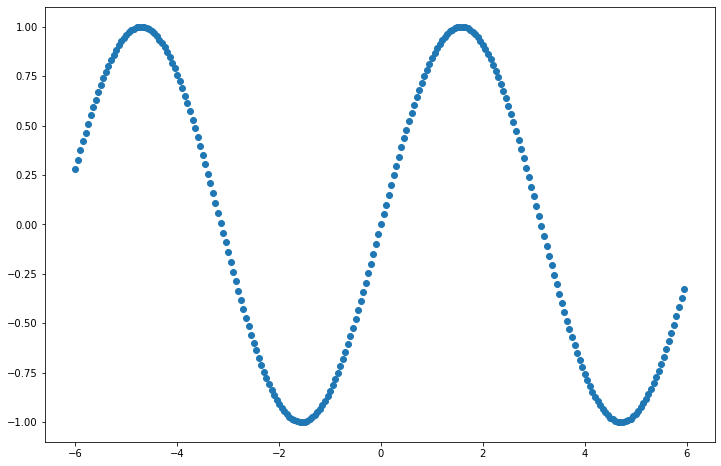

In [3]:
import matplotlib.pyplot as plt

# 可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)

### ノイズ追加
大変きれいなsin関数ですが、実際に信号はそんなにきれいではないので、少しノイズを加えてみましょう

In [4]:
# 数値を作る関数
def gen_function(x):
    y = math.sin(x)
    y += np.random.normal(-0.2, 0.2)  # 少しノイズを加える
    return y

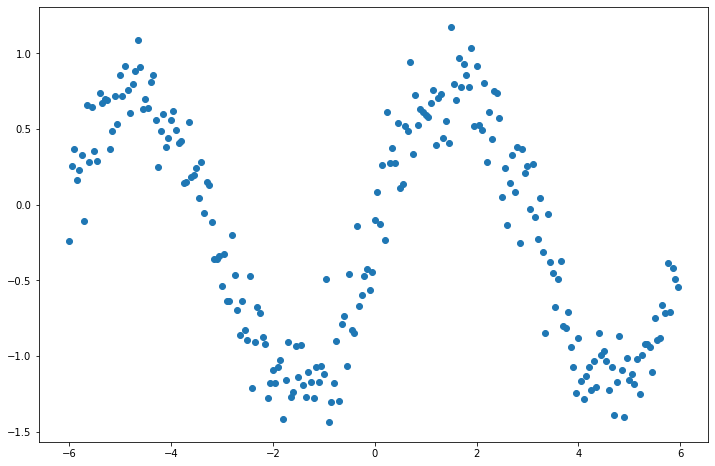

In [5]:
data_x, data_y = generate_signal()

# 可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)

### データ損失
たまに、うまくデータ取れない場合もあるので、さらに、信号から一部のデータを抜けてみましょう

In [6]:
# 信号を生成
def generate_signal(skip=(-6, -6)):
    
    # x と yの出力
    data_x = []
    data_y = []
       
    # x軸のサンプリング
    for x in np.arange(-6, 6, 0.05):
    
        # ランダムにデータが失う
        if x > skip[0] and x < skip[1]:
            continue
        
        y = gen_function(x)
        
        data_y.append(y)
        data_x.append(x)
        
    return  np.array(data_x), np.array(data_y)

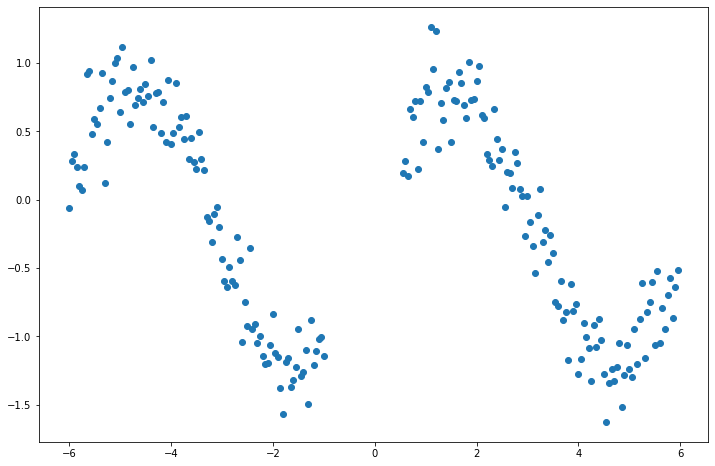

In [7]:
data_x, data_y = generate_signal((-1.0, 0.5))

# 可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)

これで、回帰できるのか確認してみましょう

## モデル構築

In [8]:
from keras.layers import Input, Dense
from keras.models import Model

def create_model():
    
    lyr_input = Input(shape=(1,))
    lyr_hiddn = Dense(units=8, activation="tanh")(lyr_input)
    lyr_hiddn = Dense(units=16, activation="tanh")(lyr_hiddn)
    lyr_hiddn = Dense(units=8, activation="tanh")(lyr_hiddn)
    lyr_outpt = Dense(units=1, activation="tanh")(lyr_hiddn)
    
    model = Model(inputs=lyr_input, outputs=lyr_outpt)
    return model

model = create_model()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [9]:
#回帰の場合は誤差を減らしたいため、mseはOK
model.compile(optimizer="adam", loss="mse")

## 前処理と学習

In [10]:
# 前処理として、最大値と最小値の間に正規化だけです
min_y = min(data_y)
max_y = max(data_y)
prep_y = (data_y - min_y) / (max_y - min_y)

In [11]:
model.fit(data_x, prep_y, batch_size=100, epochs=1000)

Epoch 1/1000
3/3 [==============================] - 0s 0s/step - loss: 0.4289
Epoch 2/1000
3/3 [==============================] - 0s 664us/step - loss: 0.3749
Epoch 3/1000
3/3 [==============================] - 0s 766us/step - loss: 0.3305
Epoch 4/1000
3/3 [==============================] - 0s 996us/step - loss: 0.2944
Epoch 5/1000
3/3 [==============================] - 0s 982us/step - loss: 0.2665
Epoch 6/1000
3/3 [==============================] - 0s 978us/step - loss: 0.2494
Epoch 7/1000
3/3 [==============================] - 0s 997us/step - loss: 0.2365
Epoch 8/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2258
Epoch 9/1000
3/3 [==============================] - 0s 997us/step - loss: 0.2135
Epoch 10/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1980
Epoch 11/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1815
Epoch 12/1000
3/3 [==============================] - 0s 997us/step - loss: 0.1653
Epoch 13/1000
3/3 [===============

3/3 [==============================] - 0s 665us/step - loss: 0.0164
Epoch 102/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0164
Epoch 103/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 104/1000
3/3 [==============================] - 0s 664us/step - loss: 0.0162
Epoch 105/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 106/1000
3/3 [==============================] - 0s 537us/step - loss: 0.0162
Epoch 107/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 108/1000
3/3 [==============================] - 0s 511us/step - loss: 0.0161
Epoch 109/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 110/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 111/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0159
Epoch 112/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 113/1000
3/3 [===============

3/3 [==============================] - 0s 1ms/step - loss: 0.0140
Epoch 201/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 202/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 203/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0140
Epoch 204/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 205/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 206/1000
3/3 [==============================] - 0s 664us/step - loss: 0.0139
Epoch 207/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 208/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 209/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 210/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 211/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0137
Epoch 212/1000
3/3 [=====================

3/3 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 301/1000
3/3 [==============================] - 0s 997us/step - loss: 0.0128
Epoch 302/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0126
Epoch 303/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0128
Epoch 304/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0126
Epoch 305/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0126
Epoch 306/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0126
Epoch 307/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0126
Epoch 308/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0128
Epoch 309/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0128
Epoch 310/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 311/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 312/1000
3/3 [=====================

3/3 [==============================] - 0s 940us/step - loss: 0.0122
Epoch 401/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 402/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 403/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 404/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 405/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 406/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 407/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 408/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 409/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 410/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 411/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 412/1000
3/3 [=====================

3/3 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 502/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 503/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 504/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 505/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 506/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 507/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 508/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 509/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 510/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 511/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 512/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 513/1000
3/3 [=======================

3/3 [==============================] - 0s 997us/step - loss: 0.0105
Epoch 602/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 603/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 604/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 605/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 606/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 607/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 608/1000
3/3 [==============================] - 0s 996us/step - loss: 0.0105
Epoch 609/1000
3/3 [==============================] - 0s 445us/step - loss: 0.0104
Epoch 610/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 611/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 612/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 613/1000
3/3 [=================

3/3 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 702/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 703/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0101
Epoch 704/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 705/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 706/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 707/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 708/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 709/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 710/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 711/1000
3/3 [==============================] - 0s 578us/step - loss: 0.0106
Epoch 712/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 713/1000
3/3 [=====================

3/3 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 803/1000
3/3 [==============================] - 0s 996us/step - loss: 0.0104
Epoch 804/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0101
Epoch 805/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 806/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 807/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 808/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 809/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 810/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0101
Epoch 811/1000
3/3 [==============================] - 0s 853us/step - loss: 0.0100
Epoch 812/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0101
Epoch 813/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.0101
Epoch 814/1000
3/3 [====================

3/3 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 904/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 905/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 906/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 907/1000
3/3 [==============================] - 0s 996us/step - loss: 0.0099
Epoch 908/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 909/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0098
Epoch 910/1000
3/3 [==============================] - 0s 753us/step - loss: 0.0098
Epoch 911/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0098
Epoch 912/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 913/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0102
Epoch 914/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0100
Epoch 915/1000
3/3 [======================

In [12]:
#データ抜けなしで推論
full_x, _ = generate_signal()
pred_y = model.predict(full_x)

In [13]:
# 正規化した数値を元に戻す（後処理）
pred_y = (pred_y * (max_y - min_y)) + min_y

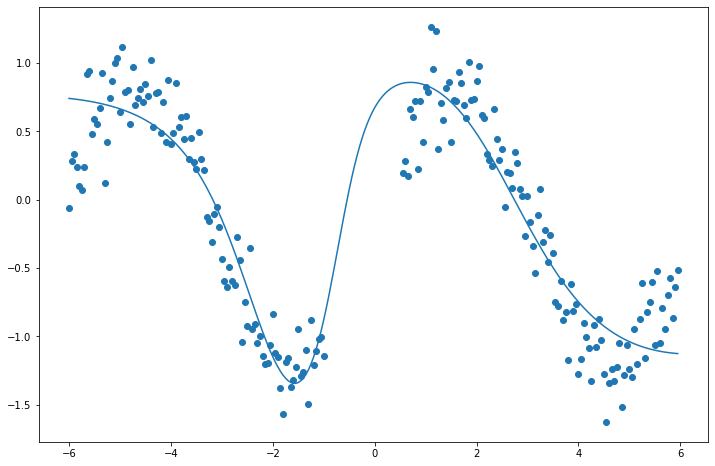

In [14]:
#可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)
plt.plot(full_x, pred_y)

## 他の関数はどう？

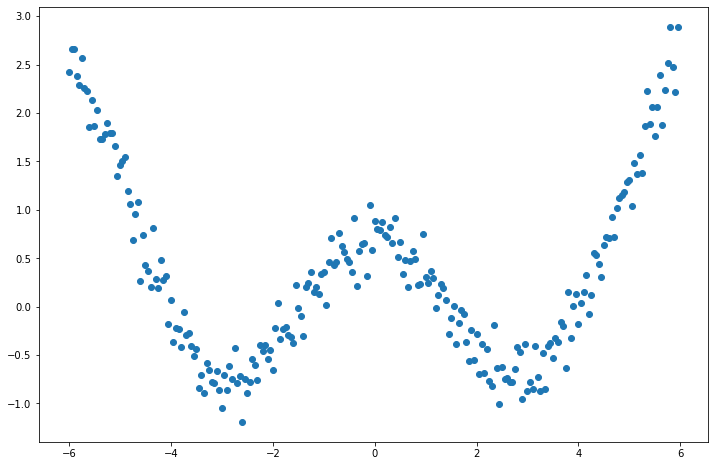

In [15]:
# 数値を作る関数
def gen_function(x):
    y = math.cos(x) + 0.05 * (x * x)
    y += np.random.normal(-0.2, 0.2)  # 少しノイズを加える
    return y

data_x, data_y = generate_signal()

# 可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)

In [16]:
model = create_model()
model.compile(optimizer="adam", loss="mse")

In [17]:
# y軸を「最大値」と「最小値」の間に正規化
min_y = min(data_y)
max_y = max(data_y)
prep_y = (data_y - min_y) / (max_y - min_y)

model.fit(data_x, prep_y, batch_size=100, epochs=1000)

Epoch 1/1000
3/3 [==============================] - 0s 0s/step - loss: 0.2012
Epoch 2/1000
3/3 [==============================] - 0s 998us/step - loss: 0.1788
Epoch 3/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1638
Epoch 4/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1483
Epoch 5/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1359
Epoch 6/1000
3/3 [==============================] - 0s 997us/step - loss: 0.1231
Epoch 7/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1116
Epoch 8/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1014
Epoch 9/1000
3/3 [==============================] - 0s 997us/step - loss: 0.0935
Epoch 10/1000
3/3 [==============================] - 0s 997us/step - loss: 0.0862
Epoch 11/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0796
Epoch 12/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0740
Epoch 13/1000
3/3 [=======================

3/3 [==============================] - 0s 0s/step - loss: 0.0425
Epoch 104/1000
3/3 [==============================] - 0s 746us/step - loss: 0.0422
Epoch 105/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0419
Epoch 106/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.0416
Epoch 107/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0414
Epoch 108/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0408
Epoch 109/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0407
Epoch 110/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0405
Epoch 111/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0400
Epoch 112/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0396
Epoch 113/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0392
Epoch 114/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0388
Epoch 115/1000
3/3 [=======================

3/3 [==============================] - 0s 6ms/step - loss: 0.0155
Epoch 205/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 206/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 207/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 208/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 209/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 210/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 211/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 212/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 213/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 214/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 215/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 216/1000
3/3 [=======================

3/3 [==============================] - 0s 5ms/step - loss: 0.0079
Epoch 306/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 307/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0078
Epoch 308/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 309/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 310/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 311/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 312/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 313/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 314/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 315/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 316/1000
3/3 [==============================] - 0s 716us/step - loss: 0.0074
Epoch 317/1000
3/3 [======================

3/3 [==============================] - 0s 0s/step - loss: 0.0049
Epoch 407/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 408/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0049
Epoch 409/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 410/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 411/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 412/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 413/1000
3/3 [==============================] - 0s 491us/step - loss: 0.0049
Epoch 414/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 415/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0048
Epoch 416/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 417/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 418/1000
3/3 [========================

3/3 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 508/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 509/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 510/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 511/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 512/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 513/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 514/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 515/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 516/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 517/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 518/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 519/1000
3/3 [=======================

Epoch 608/1000
3/3 [==============================] - 0s 996us/step - loss: 0.0031
Epoch 609/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 610/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 611/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 612/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 613/1000
3/3 [==============================] - 0s 718us/step - loss: 0.0031
Epoch 614/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 615/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 616/1000
3/3 [==============================] - 0s 642us/step - loss: 0.0030
Epoch 617/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 618/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 619/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 620/1000
3/3 [==

3/3 [==============================] - 0s 0s/step - loss: 0.0027
Epoch 709/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0028
Epoch 710/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0029
Epoch 711/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0028
Epoch 712/1000
3/3 [==============================] - 0s 135us/step - loss: 0.0028
Epoch 713/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0027
Epoch 714/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 715/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 716/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 717/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 718/1000
3/3 [==============================] - 0s 741us/step - loss: 0.0028
Epoch 719/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 720/1000
3/3 [========================

Epoch 809/1000
3/3 [==============================] - 0s 859us/step - loss: 0.0027
Epoch 810/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 811/1000
3/3 [==============================] - 0s 997us/step - loss: 0.0026
Epoch 812/1000
3/3 [==============================] - 0s 951us/step - loss: 0.0026
Epoch 813/1000
3/3 [==============================] - 0s 322us/step - loss: 0.0027
Epoch 814/1000
3/3 [==============================] - 0s 929us/step - loss: 0.0026
Epoch 815/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 816/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 817/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 818/1000
3/3 [==============================] - 0s 997us/step - loss: 0.0026
Epoch 819/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 820/1000
3/3 [==============================] - 0s 908us/step - loss: 0.0026
Epoch 821/1000

3/3 [==============================] - 0s 918us/step - loss: 0.0028
Epoch 910/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 911/1000
3/3 [==============================] - 0s 996us/step - loss: 0.0027
Epoch 912/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 913/1000
3/3 [==============================] - 0s 0s/step - loss: 0.0027
Epoch 914/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 915/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 916/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 917/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 918/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 919/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 920/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 921/1000
3/3 [====================

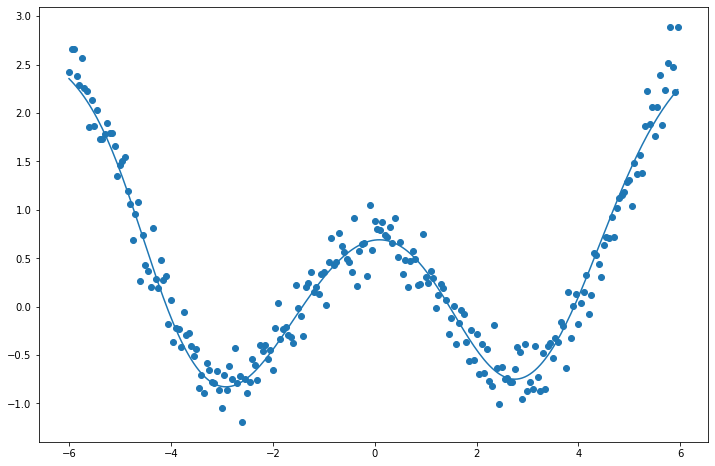

In [18]:
#推論
pred_y = model.predict(data_x)

# 正規化した数値を元に戻す
pred_y = (pred_y * (max_y - min_y)) + min_y

#可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)
plt.plot(data_x, pred_y)

### 一部を抜けると？

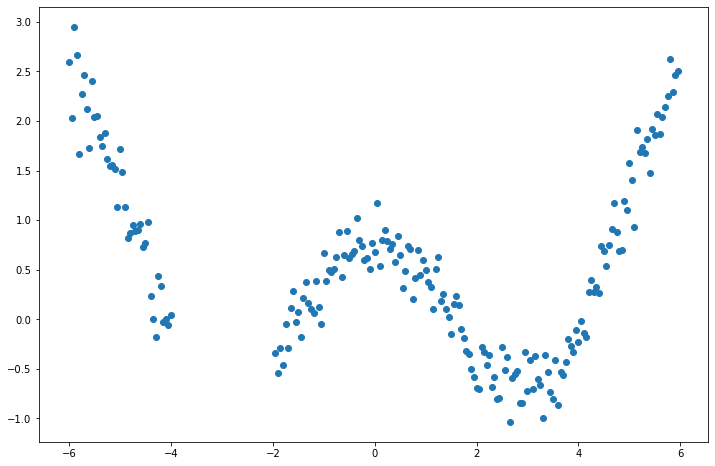

In [19]:
data_x, data_y = generate_signal((-4, -2))

# 可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)

In [20]:
model = create_model()
model.compile(optimizer="adam", loss="mse")

In [21]:
# y軸を「最大値」と「最小値」の間に正規化
min_y = min(data_y)
max_y = max(data_y)
prep_y = (data_y - min_y) / (max_y - min_y)

model.fit(data_x, prep_y, batch_size=100, epochs=1000)

Epoch 1/1000
2/2 [==============================] - 0s 0s/step - loss: 0.3802
Epoch 2/1000
2/2 [==============================] - 0s 526us/step - loss: 0.3284
Epoch 3/1000
2/2 [==============================] - 0s 997us/step - loss: 0.2801
Epoch 4/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.2340
Epoch 5/1000
2/2 [==============================] - 0s 997us/step - loss: 0.1972
Epoch 6/1000
2/2 [==============================] - 0s 716us/step - loss: 0.1679
Epoch 7/1000
2/2 [==============================] - 0s 498us/step - loss: 0.1464
Epoch 8/1000
2/2 [==============================] - 0s 997us/step - loss: 0.1329
Epoch 9/1000
2/2 [==============================] - 0s 996us/step - loss: 0.1246
Epoch 10/1000
2/2 [==============================] - 0s 998us/step - loss: 0.1195
Epoch 11/1000
2/2 [==============================] - 0s 997us/step - loss: 0.1143
Epoch 12/1000
2/2 [==============================] - 0s 993us/step - loss: 0.1088
Epoch 13/1000
2/2 [===========

2/2 [==============================] - 0s 1ms/step - loss: 0.0444
Epoch 103/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0443
Epoch 104/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0442
Epoch 105/1000
2/2 [==============================] - 0s 998us/step - loss: 0.0442
Epoch 106/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0440
Epoch 107/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0440
Epoch 108/1000
2/2 [==============================] - 0s 997us/step - loss: 0.0439
Epoch 109/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0438
Epoch 110/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0437
Epoch 111/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0436
Epoch 112/1000
2/2 [==============================] - 0s 500us/step - loss: 0.0436
Epoch 113/1000
2/2 [==============================] - 0s 999us/step - loss: 0.0435
Epoch 114/1000
2/2 [===============

2/2 [==============================] - 0s 1ms/step - loss: 0.0357
Epoch 203/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0356
Epoch 204/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0355
Epoch 205/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0354
Epoch 206/1000
2/2 [==============================] - 0s 997us/step - loss: 0.0353
Epoch 207/1000
2/2 [==============================] - 0s 779us/step - loss: 0.0352
Epoch 208/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0351
Epoch 209/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0351
Epoch 210/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0349
Epoch 211/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0348
Epoch 212/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0347
Epoch 213/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0347
Epoch 214/1000
2/2 [=====================

2/2 [==============================] - 0s 1ms/step - loss: 0.0244
Epoch 303/1000
2/2 [==============================] - 0s 816us/step - loss: 0.0243
Epoch 304/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0241
Epoch 305/1000
2/2 [==============================] - 0s 997us/step - loss: 0.0240
Epoch 306/1000
2/2 [==============================] - 0s 999us/step - loss: 0.0239
Epoch 307/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0237
Epoch 308/1000
2/2 [==============================] - 0s 997us/step - loss: 0.0236
Epoch 309/1000
2/2 [==============================] - 0s 961us/step - loss: 0.0235
Epoch 310/1000
2/2 [==============================] - 0s 678us/step - loss: 0.0234
Epoch 311/1000
2/2 [==============================] - 0s 997us/step - loss: 0.0233
Epoch 312/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0231
Epoch 313/1000
2/2 [==============================] - 0s 636us/step - loss: 0.0230
Epoch 314/1000
2/2 [=======

2/2 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 403/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 404/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0141
Epoch 405/1000
2/2 [==============================] - 0s 997us/step - loss: 0.0140
Epoch 406/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0140
Epoch 407/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 408/1000
2/2 [==============================] - 0s 987us/step - loss: 0.0138
Epoch 409/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 410/1000
2/2 [==============================] - 0s 997us/step - loss: 0.0137
Epoch 411/1000
2/2 [==============================] - 0s 633us/step - loss: 0.0137
Epoch 412/1000
2/2 [==============================] - 0s 554us/step - loss: 0.0136
Epoch 413/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0136
Epoch 414/1000
2/2 [=============

2/2 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 503/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 504/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 505/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 506/1000
2/2 [==============================] - 0s 992us/step - loss: 0.0088
Epoch 507/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 508/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 509/1000
2/2 [==============================] - 0s 995us/step - loss: 0.0087
Epoch 510/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 511/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 512/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 513/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0085
Epoch 514/1000
2/2 [====================

2/2 [==============================] - 0s 931us/step - loss: 0.0053
Epoch 603/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 604/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 605/1000
2/2 [==============================] - 0s 996us/step - loss: 0.0052
Epoch 606/1000
2/2 [==============================] - 0s 997us/step - loss: 0.0052
Epoch 607/1000
2/2 [==============================] - 0s 998us/step - loss: 0.0052
Epoch 608/1000
2/2 [==============================] - 0s 997us/step - loss: 0.0051
Epoch 609/1000
2/2 [==============================] - 0s 996us/step - loss: 0.0051
Epoch 610/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 611/1000
2/2 [==============================] - 0s 998us/step - loss: 0.0051
Epoch 612/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0050
Epoch 613/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 614/1000
2/2 [==========

2/2 [==============================] - 0s 999us/step - loss: 0.0035
Epoch 703/1000
2/2 [==============================] - 0s 999us/step - loss: 0.0035
Epoch 704/1000
2/2 [==============================] - 0s 996us/step - loss: 0.0036
Epoch 705/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 706/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 707/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 708/1000
2/2 [==============================] - 0s 814us/step - loss: 0.0034
Epoch 709/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 710/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 711/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 712/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 713/1000
2/2 [==============================] - 0s 893us/step - loss: 0.0034
Epoch 714/1000
2/2 [=============

2/2 [==============================] - 0s 996us/step - loss: 0.0031
Epoch 803/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 804/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 805/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 806/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 807/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 808/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 809/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 810/1000
2/2 [==============================] - 0s 577us/step - loss: 0.0031
Epoch 811/1000
2/2 [==============================] - 0s 974us/step - loss: 0.0031
Epoch 812/1000
2/2 [==============================] - 0s 972us/step - loss: 0.0031
Epoch 813/1000
2/2 [==============================] - 0s 564us/step - loss: 0.0031
Epoch 814/1000
2/2 [=============

2/2 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 903/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 904/1000
2/2 [==============================] - 0s 992us/step - loss: 0.0030
Epoch 905/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 906/1000
2/2 [==============================] - 0s 999us/step - loss: 0.0030
Epoch 907/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 908/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 909/1000
2/2 [==============================] - 0s 897us/step - loss: 0.0030
Epoch 910/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 911/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 912/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 913/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 914/1000
2/2 [=================

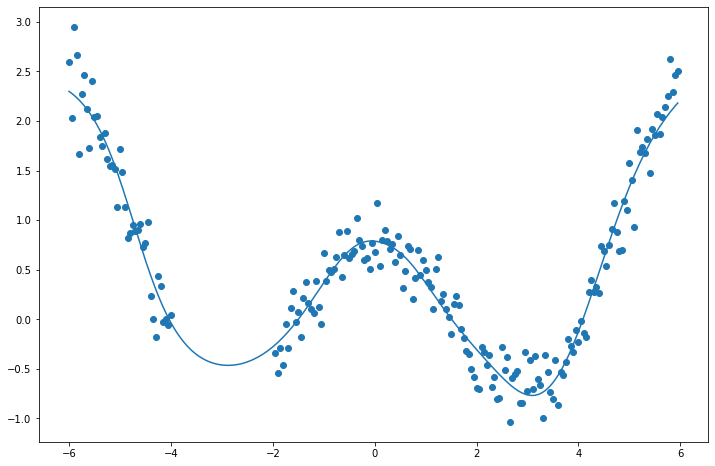

In [22]:
#データ抜けなしで推論
full_x, _ = generate_signal()
pred_y = model.predict(full_x)

# 正規化した数値を元に戻す
pred_y = (pred_y * (max_y - min_y)) + min_y

#可視化
plt.figure(figsize=(12,8))
plt.scatter(data_x, data_y)
plt.plot(full_x, pred_y)